<h1 style="color:red;">Week 1</h1>

<p style="font-size:18px;">
    <strong>This is an introductory Jupyter notebook for Week 1 on ROOT and basic physics cuts.</strong>
</p>

<h2 style="font-size:18px">What is ROOT?</h2>

<p style="font-size:16px;">
    ROOT is a powerful data analysis framework used in high-energy physics, designed for analyzing data from particle physics experiments. It provides tools for handling large datasets, performing statistical analysis, and visualizing results.
</p>

<p style="font-size:16px;">
    For our purpose, we use a python library called <code style="color:purple;">'uproot'</code>, which allows for the analysis of ROOT files without the need for a C++ ROOT installation.
</p>

<p style="font-size:16px;">
    For more information, please visit this site: 
    <a href="https://uproot.readthedocs.io/en/latest/basic.html#opening-a-file" style="color:darkblue;">
        Uproot Documentation
    </a>
</p>


In [8]:
import uproot 
file= uproot.open('/home/bhanda25/Phys323_fall2024/Root_files/ZZTo4e.root')
file

<ReadOnlyDirectory '/' at 0x7f8ed1a37af0>

In [2]:
file.keys()

['Events;1']

In [10]:
file['Events;1'].keys()

['run',
 'luminosityBlock',
 'event',
 'PV_npvs',
 'PV_x',
 'PV_y',
 'PV_z',
 'nMuon',
 'Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_tightId',
 'Muon_softId',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'nElectron',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

In [7]:
file['Events;1'].keys(filter_name='Electron*')

['Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

In [63]:
#I can define tree to denote this event:
tree=file['Events;1']

In [64]:
tree['Electron_pt'].array()

<Array [[23.2, 36.2, 13.6, 38.1], ..., [...]] type='72853 * var * float32'>

In [65]:
Electron_pt=tree['Electron_pt'].array()
Electron_pt

<Array [[23.2, 36.2, 13.6, 38.1], ..., [...]] type='72853 * var * float32'>

<h1 style="color:red;">Let's look at a basic cut using numpy to remove unwanted values</h1>


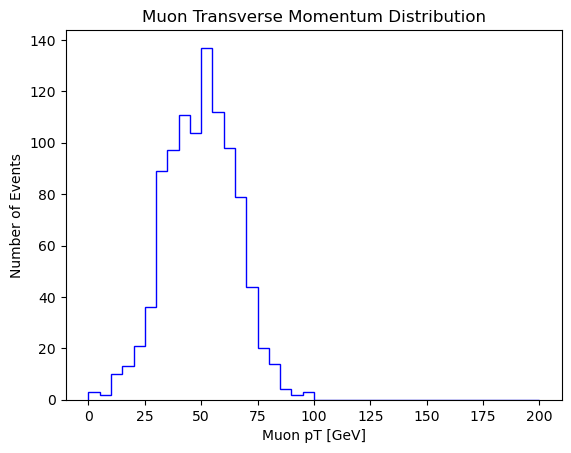

In [67]:
import numpy as np 
import matplotlib.pyplot as plt

# Generating synthetic data for muon transverse momentum (muon_pt)
np.random.seed(12)
muon_pt = np.random.normal(50, 15, 1000)  # Mean 50 GeV, standard deviation 15 GeV


# Plotting the Muon transverse momentum
plt.hist(muon_pt, bins=40, range=(0, 200), histtype='step', color='blue')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.show()

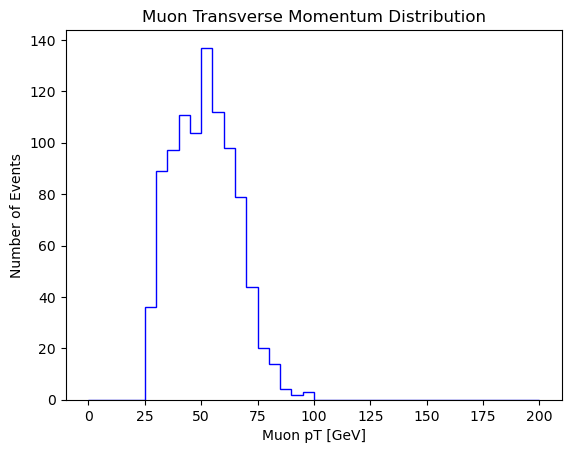

In [69]:
muon_pt_mask=muon_pt > 25
# Applying a cut to remove some muon values 
muon_pt = muon_pt[muon_pt_mask]

# Plotting the Muon transverse momentum
plt.hist(muon_pt, bins=40, range=(0, 200), histtype='step', color='blue')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.show()

<h1 style="color:red;">Let's apply some cuts to the root file above </h1>

In [46]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
# Open the ROOT file
file1 = uproot.open('/home/bhanda25/Phys323_fall2024/Root_files/ZZTo4e.root')
tree=file1['Events;1']
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'PV_npvs',
 'PV_x',
 'PV_y',
 'PV_z',
 'nMuon',
 'Muon_pt',
 'Muon_eta',
 'Muon_phi',
 'Muon_mass',
 'Muon_charge',
 'Muon_pfRelIso03_all',
 'Muon_pfRelIso04_all',
 'Muon_tightId',
 'Muon_softId',
 'Muon_dxy',
 'Muon_dxyErr',
 'Muon_dz',
 'Muon_dzErr',
 'nElectron',
 'Electron_pt',
 'Electron_eta',
 'Electron_phi',
 'Electron_mass',
 'Electron_charge',
 'Electron_pfRelIso03_all',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr']

In [70]:
#Acess the kinematics of the file 
muon_pt=tree['Muon_pt'].array()
muon_eta=tree['Muon_eta'].array()
muon_phi=tree['Muon_phi'].array()
muon_count=tree['nMuon'].array()
electron_count=tree['nElectron'].array()

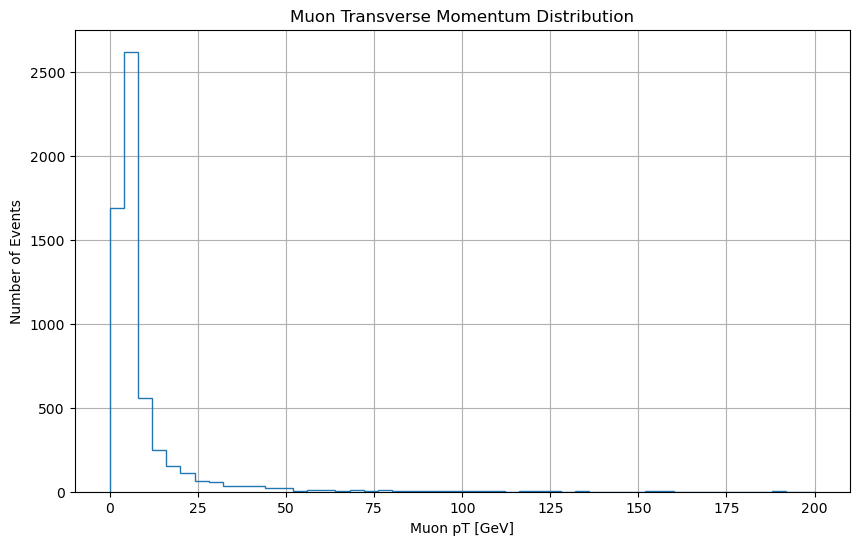

In [62]:
#let's say that I want to plot muon_pt

muon_pt_flat = ak.flatten(muon_pt)

# Plotting the Muon transverse momentum
plt.figure(figsize=(10, 6))
plt.hist(muon_pt_flat, bins=50, range=(0, 200), histtype='step')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.grid(True)
plt.show()

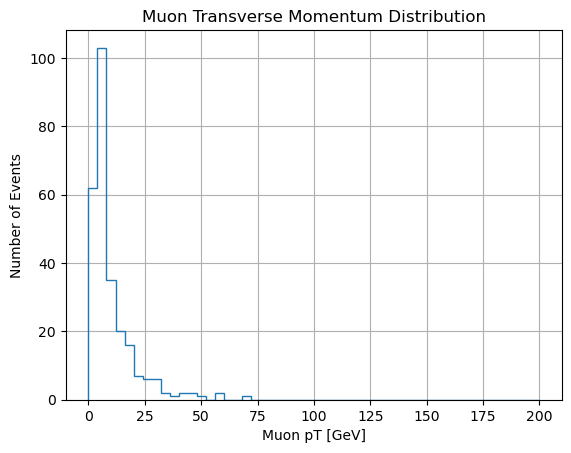

In [60]:
#let's say that I want to look at only those events that have 4 muons at the final state
muon_count_mask=(muon_count >=4)

#Now I want to look at the momentum of the muon after this cut
filtered_muon=[]
for i in range(len(muon_count)):
    if muon_count_mask[i]:
        filtered_muon.append(muon_pt[i])
        
filtered_muon_pt =ak.flatten(filtered_muon)        
# Plotting the Muon transverse momentum
plt.hist(filtered_muon_pt, bins=50, range=(0, 200), histtype='step')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.grid(True)
plt.show()

<h1 style="color:green;">Homework #1 for CMS: Make a plot of Muon transverse Momentum Distribution and Electron transverse Momentum Distribution when 2 electron and 2 muons are at the final state. Download the code and upload them to the brightspace. You need to make sure that when the code is ran, there should not be error because of the code.</h1>
